In [67]:
"""!apt-get install -y xvfb python-opengl > /dev/null 2>&1 
!pip install gym pyvirtualdisplay > /dev/null 2>&1 
!pip install gym pyvirtualdisplay > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1 
!pip install gym[classic_control] !apt-get update > /dev/null 2>&1 
!apt-get install cmake > /dev/null 2>&1 
!pip install --upgrade setuptools 2>&1 
!pip install ez_setup > /dev/null 2>&1"""

!pip install moviepy
!pip install PyOpenGL
!pip install gym pyvirtualdisplay
!pip install ffmpeg-python
!pip install logger
!pip install tensorflow
!pip install --upgrade setuptools
!pip install ez_setup
!pip install setuptools
!pip install gym[classic_control]

     -------------------------------------- 388.3/388.3 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 22.6/22.6 MB 28.5 MB/s eta 0:00:00
     ---------------------------------------- 143.8/143.8 kB ? eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110764 sha256=216add6ab5b01e770ee8a9e1321ac7299fee399fa6310b68a2cb0eeb9fbebf97
  Stored in directory: c:\users\evans\appdata\local\pip\cache\wheels\29\15\e4\4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.0
    Uninstalling urllib3-2.2.0:
      Successfully uninstalled urllib3-2.2.0
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.



     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
  Attempting uninstall: pyasn1
    Found existing installation: pyasn1 0.5.1
    Uninstalling pyasn1-0.5.1:
      Successfully uninstalled pyasn1-0.5.1


In [60]:
#!pip install --upgrade --force-reinstall tensorflow

  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)
  Using cached grpcio-1.60.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
     ---------------------------------------- 53.0/53.0 kB ? eta 0:00:00
  Using cached protobuf-4.25.2-cp39-cp39-win_amd64.whl (413 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\evans\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [62]:
import gym
import logger as gymlogger
from gym.wrappers import RecordVideo
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [8]:
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [26]:
env = gym.make("CartPole-v1")

print(env.action_space)  #Discrete(2) means 2 valid actions (0,1)

Discrete(2)


In [27]:
print(env.observation_space) 
#Box[0] = min of (position, velocity, pole angle, angular velocity)
#Box[1] = max

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [28]:
observation = env.reset() 
print("Initial observations:", observation)

Initial observations: (array([ 0.03243624, -0.04557044,  0.00083109,  0.02327398], dtype=float32), {})


# Unpack step result

In [70]:
def getEnv():
    step_result = env.step(0)

    #SUnpack the tuple
    observation = step_result[0]  # Assuming the first four elements are observations
    reward = step_result[1]         # The fifth element is the reward
    done = step_result[2]           # The sixth element indicates whether the episode is done
    info = step_result[3]          # idk
    
    return observation, reward, done, info
    
#Array return is the current pole position, velocity, pole angle and angular veloc

# Game Demo

### Run till 0.20944 <= pole angle <= -0.20944 (12 degrees)
### Run till 2.4 <= cart position <= -2.4
### Run till 500 steps or rewards

In [71]:
observation = env.reset() 
cumulative_reward = 0 
done = False 
while not done: 
    observation, reward, done, info = getEnv()

    #Results
    print("New observations after choosing action 0:", observation)
    print("Reward for this step:", reward)
    print("Is this round done?", done)
    
    cumulative_reward += reward #Every step add 1
    
    print("Cumulative reward for this round:", cumulative_reward)

New observations after choosing action 0: [-0.00415754 -0.18323302  0.00841441  0.33818486]
Reward for this step: 1.0
Is this round done? False
Cumulative reward for this round: 1.0
New observations after choosing action 0: [-0.0078222  -0.3784737   0.0151781   0.63350934]
Reward for this step: 1.0
Is this round done? False
Cumulative reward for this round: 2.0
New observations after choosing action 0: [-0.01539167 -0.573804    0.02784829  0.9309333 ]
Reward for this step: 1.0
Is this round done? False
Cumulative reward for this round: 3.0
New observations after choosing action 0: [-0.02686775 -0.76929057  0.04646695  1.2322357 ]
Reward for this step: 1.0
Is this round done? False
Cumulative reward for this round: 4.0
New observations after choosing action 0: [-0.04225357 -0.9649782   0.07111167  1.5391067 ]
Reward for this step: 1.0
Is this round done? False
Cumulative reward for this round: 5.0
New observations after choosing action 0: [-0.06155313 -1.16088     0.1018938   1.853106  

# Task 1: Development of RL agent

In [80]:
def rand_policy_agent(observation): 
    return random.randint(0, 1)

In [81]:
observation = env.reset() 
action = rand_policy_agent(observation) 

print("Observation:", observation) 
print("Chosen action:", action)  #Discrete(2) = 0 or 1

Observation: (array([-0.03994995,  0.01816119,  0.02909988, -0.03636798], dtype=float32), {})
Chosen action: 0


# Task 2: Chart of RL agent run

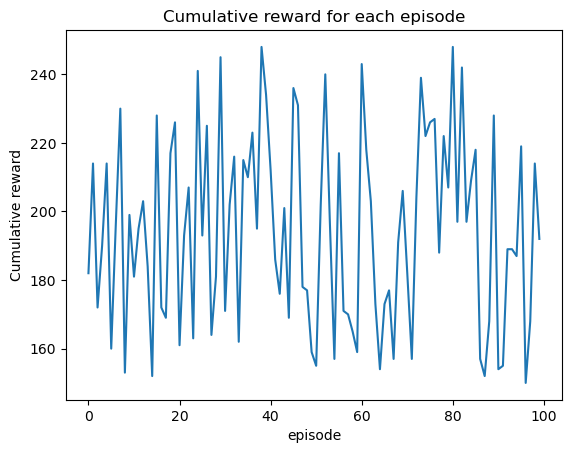

In [82]:
episode_results = np.random.randint(150, 250, size=100) 
plt.plot(episode_results) 
plt.title('Cumulative reward for each episode') 
plt.ylabel('Cumulative reward') 
plt.xlabel('episode') 
plt.show()

In [83]:
print("Average cumulative reward:", episode_results.mean()) 
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 194.46
Is my agent good enough? False


# Task 3: 1 Episode played by agent

In [86]:

env = RecordVideo(gym.make("CartPole-v1"), "./video") 
observation = env.reset() 
while True: 
    env.render() #your agent goes here 
    action = rand_policy_agent(observation) 
    observation, reward, done, info = getEnv()
    if done: 
        break; 
    env.close() 
show_video()

Could not find video
